# Customer Purchase Behavior Analysis – Data Science Mini Project

This notebook performs an end-to-end analysis of customer purchase behavior data.
It covers dataset generation, data loading, manipulation using Pandas and NumPy,
data cleaning, and exploratory data analysis (EDA) to derive meaningful business insights.


In [1]:
import pandas as pd
import numpy as np
import random


## Generating and Loading Customer Purchase Behavior Dataset

In [2]:
rows = []

for i in range(550):   # 550 rows (minimum 500 required)

    customer_id = f"CUST_{1000 + i}"
    age = random.randint(18, 60)
    gender = random.choice(["Male", "Female"])

    category = random.choice([
        "Electronics",
        "Clothing",
        "Groceries",
        "Beauty",
        "Home",
        "Footwear",
        "Sports & Fitness",
        "Books",
        "Toys",
        "Furniture",
        "Jewellery",
        "Health & Wellness",
        "Automotive",
        "Pet Supplies",
        "Stationery"
    ])

    purchase_amount = random.randint(300, 5000)
    payment_method = random.choice(["UPI", "Credit Card", "Debit Card", "Cash"])
    rating = random.randint(1, 5)

    rows.append([
        customer_id,
        age,
        gender,
        category,
        purchase_amount,
        payment_method,
        rating
    ])

df = pd.DataFrame(
    rows,
    columns=[
        "Customer_ID",
        "Age",
        "Gender",
        "Product_Category",
        "Purchase_Amount",
        "Payment_Method",
        "Rating"
    ]
)

df.to_csv("customer_purchase_data.csv", index=False)

df.head()


,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Payment_Method,Rating
0,CUST_1000,31,Male,Electronics,3431,Cash,1
1,CUST_1001,49,Female,Beauty,1200,Credit Card,1
2,CUST_1002,25,Male,Furniture,1289,UPI,1
3,CUST_1003,47,Female,Pet Supplies,4157,Cash,1
4,CUST_1004,43,Male,Sports & Fitness,2263,Credit Card,3


In [4]:
df = pd.read_csv("customer_purchase_data.csv")

## Displaying Basic Information

In [5]:
df.head(10)


,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Payment_Method,Rating
0,CUST_1000,31,Male,Electronics,3431,Cash,1
1,CUST_1001,49,Female,Beauty,1200,Credit Card,1
2,CUST_1002,25,Male,Furniture,1289,UPI,1
3,CUST_1003,47,Female,Pet Supplies,4157,Cash,1
4,CUST_1004,43,Male,Sports & Fitness,2263,Credit Card,3
5,CUST_1005,40,Male,Beauty,1900,Credit Card,1
6,CUST_1006,23,Female,Toys,1149,Cash,4
7,CUST_1007,36,Male,Pet Supplies,427,Cash,1
8,CUST_1008,58,Male,Footwear,4027,Credit Card,4
9,CUST_1009,48,Male,Sports & Fitness,1657,Debit Card,1


In [6]:
df.tail(10)


,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Payment_Method,Rating
540,CUST_1540,54,Male,Books,4210,UPI,4
541,CUST_1541,50,Male,Sports & Fitness,3141,UPI,5
542,CUST_1542,29,Female,Toys,2049,Credit Card,4
543,CUST_1543,42,Female,Toys,723,Credit Card,1
544,CUST_1544,25,Male,Footwear,301,UPI,3
545,CUST_1545,46,Female,Health & Wellness,1869,Debit Card,2
546,CUST_1546,38,Male,Pet Supplies,2738,Debit Card,1
547,CUST_1547,30,Male,Home,3630,Debit Card,4
548,CUST_1548,18,Female,Home,4584,UPI,2
549,CUST_1549,58,Male,Automotive,913,UPI,1


In [7]:
df.shape


(550, 7)

In [8]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Customer_ID       550 non-null    str  
 1   Age               550 non-null    int64
 2   Gender            550 non-null    str  
 3   Product_Category  550 non-null    str  
 4   Purchase_Amount   550 non-null    int64
 5   Payment_Method    550 non-null    str  
 6   Rating            550 non-null    int64
dtypes: int64(3), str(4)
memory usage: 30.2 KB


## Feature Engineering

Derived columns are created from existing data to enhance business understanding
and enable deeper analysis of customer purchase behavior.


In [14]:
import numpy as np

# 1. Customer spending level based on purchase amount
df["Spending_Level"] = pd.cut(
    df["Purchase_Amount"],
    bins=[0, 1500, 3000, 5000],
    labels=["Low", "Medium", "High"]
)

# 2. Age segmentation for customer profiling
df["Customer_Age_Group"] = pd.cut(
    df["Age"],
    bins=[17, 25, 35, 45, 60],
    labels=["18-25", "26-35", "36-45", "46-60"]
)

# 3. Rating category for service quality analysis
df["Rating_Category"] = np.where(df["Rating"] >= 4, "Positive", "Needs Improvement")

df.head()


,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Payment_Method,Rating,Spending_Level,Customer_Age_Group,Rating_Category
0,CUST_1000,31,Male,Electronics,3431,Cash,1,High,26-35,Needs Improvement
1,CUST_1001,49,Female,Beauty,1200,Credit Card,1,Low,46-60,Needs Improvement
2,CUST_1002,25,Male,Furniture,1289,UPI,1,Low,18-25,Needs Improvement
3,CUST_1003,47,Female,Pet Supplies,4157,Cash,1,High,46-60,Needs Improvement
4,CUST_1004,43,Male,Sports & Fitness,2263,Credit Card,3,Medium,36-45,Needs Improvement


In [15]:
df.to_csv("customer_purchase_new.csv", index=False)


## Filtering Customer Data

The dataset is filtered to identify customers who represent high-value and
high-satisfaction segments.


In [12]:
filtered_df = df[
    (df["Spending_Level"] == "High") &
    (df["Rating_Category"] == "Positive")
]

filtered_df.head()


,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Payment_Method,Rating,Spending_Level,Customer_Age_Group,Rating_Category
8,CUST_1008,58,Male,Footwear,4027,Credit Card,4,High,46-60,Positive
15,CUST_1015,27,Male,Furniture,4821,Cash,5,High,26-35,Positive
18,CUST_1018,21,Female,Electronics,4787,Debit Card,5,High,18-25,Positive
20,CUST_1020,48,Female,Books,3618,Credit Card,5,High,46-60,Positive
26,CUST_1026,27,Female,Beauty,4823,Credit Card,5,High,26-35,Positive


## Grouped Analysis by Product Category

Data is grouped by product category to calculate average purchase amount and
customer count, helping identify top-performing categories.



In [13]:
category_analysis = df.groupby("Product_Category")["Purchase_Amount"].agg(
    Average_Purchase_Amount="mean",
    Number_of_Customers="count"
)

category_analysis


,Average_Purchase_Amount,Number_of_Customers
Product_Category,,
Automotive,2501.050000,40
Beauty,2630.580645,31
Books,2905.547619,42
Clothing,2192.542857,35
Electronics,2548.441176,34
Footwear,2828.739130,23
Furniture,2640.653846,52
Groceries,2434.266667,30
Health & Wellness,2361.341463,41


## Data Cleaning

This section focuses on cleaning the customer purchase dataset.
The steps include introducing missing values, handling them appropriately,
removing duplicates, correcting data types, and saving a cleaned dataset.


## Insert Missing Values
Missing values were intentionally added to simulate real-world data issues.


In [14]:
import numpy as np

df_clean = df.copy()

df_clean.loc[5:9, "Age"] = np.nan
df_clean.loc[15:19, "Purchase_Amount"] = np.nan
df_clean.loc[25:27, "Payment_Method"] = np.nan

df_clean.isnull().sum()


Customer_ID           0
Age                   5
Gender                0
Product_Category      0
Purchase_Amount       5
Payment_Method        3
Rating                0
Spending_Level        0
Customer_Age_Group    0
Rating_Category       0
dtype: int64

## Handle Missing Values (Mean, Median, Mode)
Numerical columns were handled using mean and median.
Categorical missing values were filled using mode.


In [16]:
df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())
df_clean["Purchase_Amount"] = df_clean["Purchase_Amount"].fillna(df_clean["Purchase_Amount"].mean())
df_clean["Payment_Method"] = df_clean["Payment_Method"].fillna(df_clean["Payment_Method"].mode()[0])

df_clean.isnull().sum()



Customer_ID           0
Age                   0
Gender                0
Product_Category      0
Purchase_Amount       0
Payment_Method        0
Rating                0
Spending_Level        0
Customer_Age_Group    0
Rating_Category       0
dtype: int64

## Remove Duplicate Rows
Duplicate records were identified and removed to ensure data accuracy.


In [17]:
df_clean = pd.concat([df_clean, df_clean.iloc[0:5]])
df_clean.drop_duplicates(inplace=True)

df_clean.shape


(550, 10)

## Convert Incorrect Data Types
Data types were verified and corrected for proper analysis.


In [18]:
df_clean["Purchase_Amount"] = pd.to_numeric(df_clean["Purchase_Amount"])
df_clean.dtypes


Customer_ID                str
Age                    float64
Gender                     str
Product_Category           str
Purchase_Amount        float64
Payment_Method             str
Rating                   int64
Spending_Level        category
Customer_Age_Group    category
Rating_Category            str
dtype: object

## Save Cleaned Dataset
The cleaned dataset was saved as a new CSV file for further analysis.


In [19]:
df_clean.to_csv("customer_purchase_data_cleaned.csv", index=False)


## Exploratory Data Analysis (EDA)

In this section, exploratory data analysis is performed on the cleaned customer
purchase dataset to identify patterns, trends, and relationships between variables
using visualizations.

## Distribution of a Numerical Column (Purchase Amount)
This plot shows how customer purchase amounts are distributed across transactions.


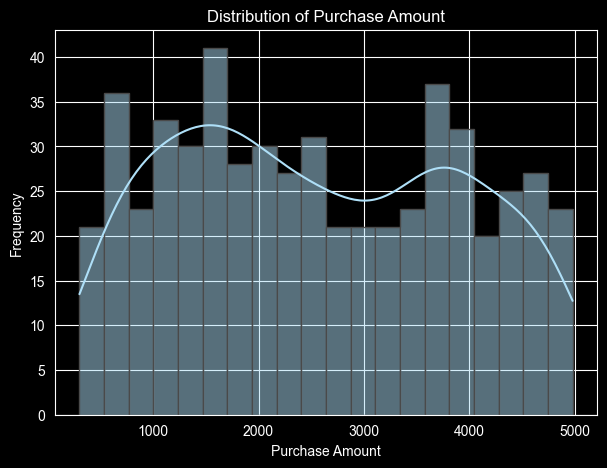

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.histplot(
    df_clean["Purchase_Amount"],
    bins=20,
    kde=True,
    color="#AEDFF7",      # light blue
    edgecolor="#4A4A4A"   # soft dark grey
)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()


##  Outlier Detection Using Box Plot (Purchase Amount)
The box plot helps identify outliers and variation in customer spending.


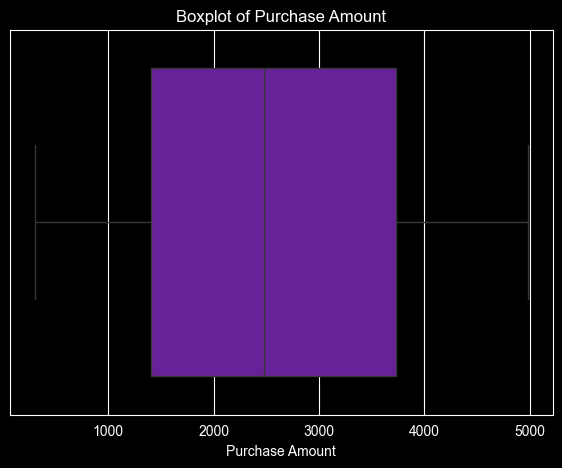

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x=df_clean["Purchase_Amount"],
    color="#6A0DAD"    # light pastel pink
)
plt.title("Boxplot of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.show()


## Comparison Between Two Categories (Gender vs Purchase Amount)
This comparison highlights differences in average spending between genders.


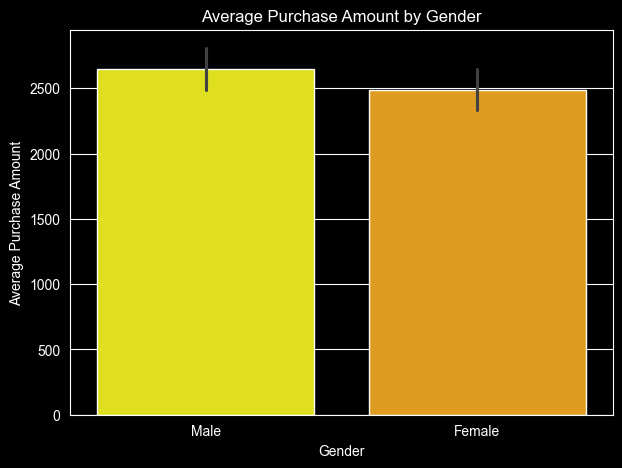

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(
    x="Gender",
    y="Purchase_Amount",
    data=df_clean,
    estimator="mean",
    hue="Gender",             # assign x to hue
    palette=["yellow", "orange"],  # two colors for two genders
    dodge=False,              # keeps bars together
    legend=False              # removes extra legend
)
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount")
plt.show()


## Category-wise Purchase Comparison (Product Category)
This plot compares average spending across different product categories.


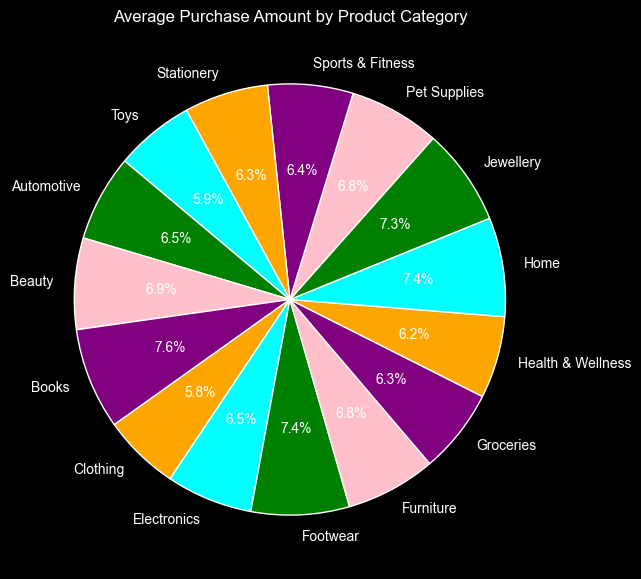

In [29]:
means = df_clean.groupby("Product_Category")["Purchase_Amount"].mean()
colors = ["green", "pink", "purple", "orange", "cyan"]

plt.figure(figsize=(7,7))
plt.pie(
    means,
    labels=means.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=140
)
plt.title("Average Purchase Amount by Product Category")
plt.show()


## Correlation Heatmap
The correlation heatmap shows relationships between numerical variables.


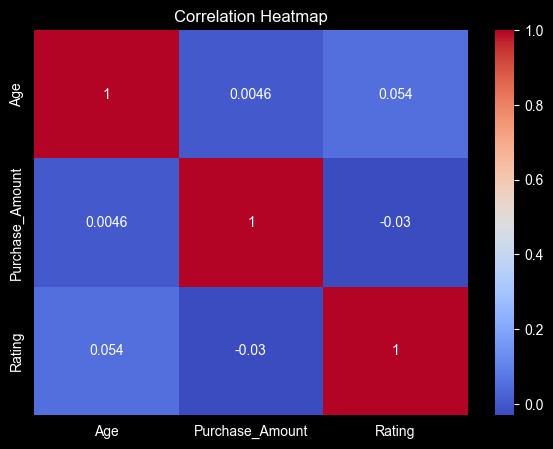

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(
    df_clean[["Age", "Purchase_Amount", "Rating"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


## Business Insights Summary

1.Most customers spend within a similar price range, showing stable purchasing behavior. However, a small number of high-value purchases contribute significantly to overall revenue.

2.Spending patterns differ across customer groups, such as gender and product categories. This suggests that targeted marketing and personalized offers can be more effective than general promotions.

3.Some product categories have higher average purchase amounts, making them ideal for premium positioning, better visibility, and increased marketing focus.

4.Customer age has very little impact on purchase amount, indicating that buying decisions are influenced more by customer preferences and product relevance than by age.

5.Higher-priced purchases tend to receive better customer ratings, suggesting that customers associate higher value and satisfaction with premium products.